In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import klib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score

# Data Handling

In [364]:
dataset = pd.read_csv("IMDb Movies India.csv", encoding='Windows-1252')
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [365]:
print("General information about the dataset:")
dataset.info()

General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [366]:
dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [367]:
dataset.describe(include = "all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [368]:
dataset.size

155090

In [369]:
dataset.columns 

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [370]:
dataset.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [371]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

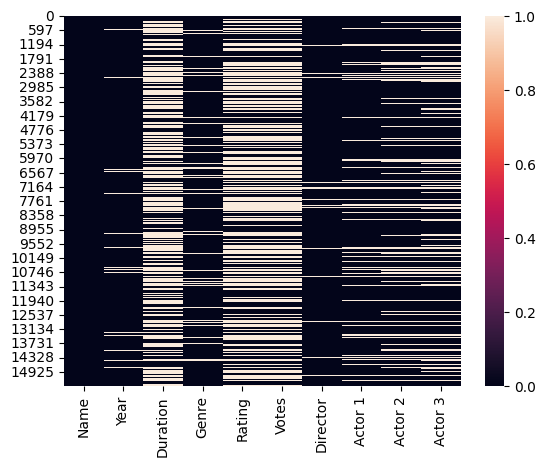

In [372]:
sns.heatmap(dataset.isnull())

In [373]:
print("before :", sum(dataset.isnull().sum()))
dataset = dataset.fillna(dataset.bfill())
print("after :", sum(dataset.isnull().sum()))

before : 33523
after : 0


<Axes: >

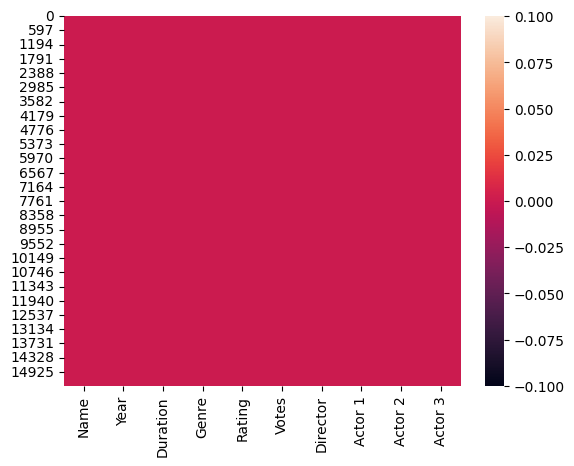

In [374]:
sns.heatmap(dataset.isnull())

In [375]:
dataset = dataset.drop_duplicates()
print(dataset.duplicated().sum())

0


In [376]:
from scipy.stats import zscore

numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

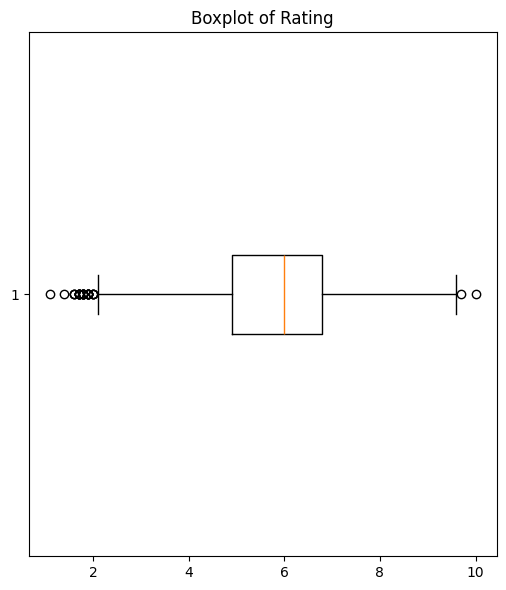

In [377]:
#Boxplots
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot((len(numeric_columns.columns) + 1) // 2, 2, i + 1)
    plt.boxplot(numeric_columns[column], vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_8792\2838213239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


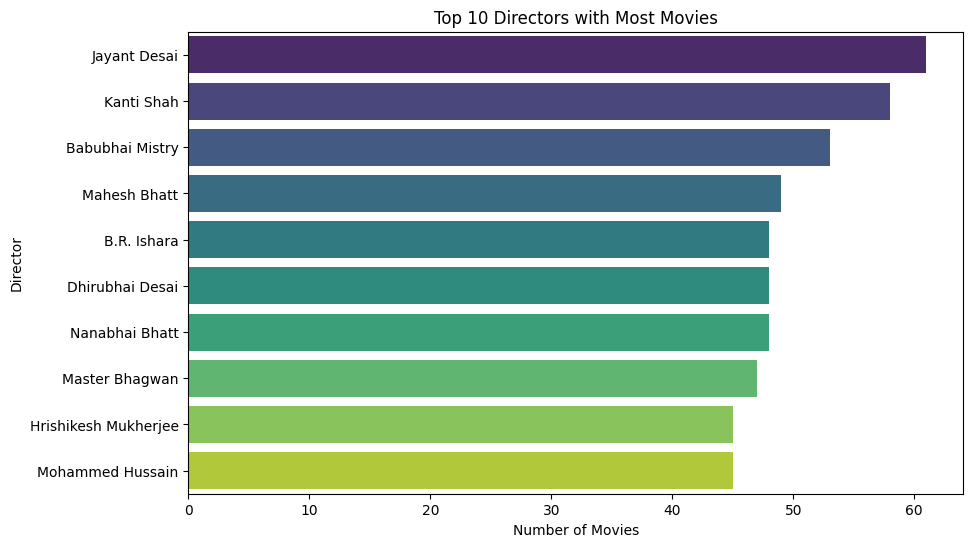

In [378]:
# Bar Plot: Director with Most Movies

plt.figure(figsize=(10, 6))
top_directors = dataset['Director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [379]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),109 min,Drama,7.0,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",4.4,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,4.7,827,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [380]:
dataset['Genre'] = dataset['Genre'].str.split(', ')

In [381]:
dataset.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),109 min,[Drama],7.0,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"[Drama, Musical]",4.4,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [382]:
categorical_columns = dataset.select_dtypes(include=[object]).columns 
categorical_columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [383]:
for column in categorical_columns:  
    print(f"Colonne: {column}, Type: {dataset[column].apply(type).unique()}")

Colonne: Name, Type: [<class 'str'>]
Colonne: Year, Type: [<class 'str'>]
Colonne: Duration, Type: [<class 'str'>]
Colonne: Genre, Type: [<class 'list'>]
Colonne: Votes, Type: [<class 'str'>]
Colonne: Director, Type: [<class 'str'>]
Colonne: Actor 1, Type: [<class 'str'>]
Colonne: Actor 2, Type: [<class 'str'>]
Colonne: Actor 3, Type: [<class 'str'>]


In [384]:
for column in categorical_columns:  
    if dataset[column].apply(type).eq(list).any():  
        # Convert lists to strings 
        dataset[column] = dataset[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [385]:
for column in categorical_columns:  
    print(f"Colonne: {column}, Type: {dataset[column].apply(type).unique()}")

Colonne: Name, Type: [<class 'str'>]
Colonne: Year, Type: [<class 'str'>]
Colonne: Duration, Type: [<class 'str'>]
Colonne: Genre, Type: [<class 'str'>]
Colonne: Votes, Type: [<class 'str'>]
Colonne: Director, Type: [<class 'str'>]
Colonne: Actor 1, Type: [<class 'str'>]
Colonne: Actor 2, Type: [<class 'str'>]
Colonne: Actor 3, Type: [<class 'str'>]


In [386]:
dataset.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),109 min,Drama,7.0,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",4.4,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [387]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder 

categorical_columns = dataset.select_dtypes(include=[object]).columns  
label_encoder = LabelEncoder()    
for column in categorical_columns:  
    dataset[column] = label_encoder.fit_transform(dataset[column])  

dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,98,9,299,7.0,1849,1926,2250,800,3108
1,1,98,9,299,7.0,1849,1548,3280,4790,527
2,2,100,172,351,4.4,1169,5123,3713,2866,3450
3,3,98,10,228,4.4,1169,3319,2917,1504,4020
4,7,89,5,299,4.7,1898,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...,...
15504,13832,67,29,0,4.6,368,2690,2586,4299,4262
15505,13834,78,29,40,4.5,1687,2499,227,4532,519
15506,13835,84,30,0,6.2,794,2424,3609,1589,490
15507,13836,67,30,0,6.2,794,2195,1139,1589,490


In [388]:
dataset.dtypes

Name          int32
Year          int32
Duration      int32
Genre         int32
Rating      float64
Votes         int32
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object

# Machine Learning: Regression

In [389]:
X = dataset.drop(columns=['Rating'])  
y = dataset['Rating'] 

In [390]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LinearRegression model

In [391]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [392]:
y_predict1 = regressor.predict(X_test)
y_predict1

array([5.65666578, 5.72127582, 5.62850258, ..., 5.92451631, 5.87743452,
       5.96034331])

In [393]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#calculate evaluation metrics (regression metrics and not classification's)
mae = mean_absolute_error(y_test, y_predict1)
mse = mean_squared_error(y_test, y_predict1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict1)

#print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")  # the lower the MAE, the better the model predicts
print(f"Mean Squared Error (MSE): {mse}")  # value closer to zero
print(f"Root Mean Squared Error (RMSE): {rmse}")  # between 0.2 and 0.5
print(f"R-squared (R2) Score: {r2}")  # between 0.50 to 0.99

Mean Absolute Error (MAE): 1.084873658465894
Mean Squared Error (MSE): 1.7968284220840993
Root Mean Squared Error (RMSE): 1.3404582880806473
R-squared (R2) Score: 0.012756395484699312


In [394]:
expected_columns = X_train.columns.tolist()


new_movie = pd.DataFrame({
    'Genre_Drama': [0],          # Not a Drama
    'Genre_Comedy': [1],         # A Comedy
    'Genre_Musical': [1],        # A Musical
    'Director_Gaurav Bakshi': [0],  # Not directed by Gaurav Bakshi
    'Director_Ovais Khan': [1],     # Directed by Ovais Khan
    'Actor_1': [0],              # First actor not included
    'Actor_2': [1],              # Second actor included
    'Actor_3': [1],              # Third actor included
    'Duration': [150]            # Duration of 150 minutes
    
}).reindex(columns=expected_columns, fill_value=0)

#Prediction for the new movie
predicted_rating = regressor.predict(new_movie)

print(f"The predicted rating for the new movie is: {predicted_rating[0]}")


The predicted rating for the new movie is: 6.004567864924029


## RandomForestRegressor model 

In [395]:
from sklearn.ensemble import RandomForestRegressor  
regr = RandomForestRegressor(n_estimators=100, criterion='friedman_mse')  
regr.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse')

In [396]:
y_predict2 = regr.predict(X_test)
y_predict2

array([6.333, 6.098, 5.948, ..., 6.361, 5.17 , 6.368])

In [397]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#calculate evaluation metrics (regression metrics and not classification's)
mae = mean_absolute_error(y_test, y_predict2)
mse = mean_squared_error(y_test, y_predict2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict2)

#print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")  # the lower the MAE, the better the model predicts
print(f"Mean Squared Error (MSE): {mse}")  # value closer to zero
print(f"Root Mean Squared Error (RMSE): {rmse}")  # between 0.2 and 0.5
print(f"R-squared (R2) Score: {r2}")  # between 0.50 to 0.99

Mean Absolute Error (MAE): 0.9972467741935485
Mean Squared Error (MSE): 1.570871049354839
Root Mean Squared Error (RMSE): 1.2533439469494554
R-squared (R2) Score: 0.13690568451993335


## modele DecisionTreeRegressor

In [398]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error')
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [399]:
y_predict3 = regressor.predict(X_test)
y_predict3

array([6. , 5.7, 5.4, ..., 8.3, 4. , 7.2])

In [400]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#calculate evaluation metrics (regression metrics and not classification's)
mae = mean_absolute_error(y_test, y_predict3)
mse = mean_squared_error(y_test, y_predict3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict3)

#print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")  # the lower the MAE, the better the model predicts
print(f"Mean Squared Error (MSE): {mse}")  # value closer to zero
print(f"Root Mean Squared Error (RMSE): {rmse}")  # between 0.2 and 0.5
print(f"R-squared (R2) Score: {r2}")  # between 0.50 to 0.99       

Mean Absolute Error (MAE): 1.3696774193548387
Mean Squared Error (MSE): 3.137316129032258
Root Mean Squared Error (RMSE): 1.7712470547702424
R-squared (R2) Score: -0.7237568404763524


# Correlation Matrix (heatmap)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

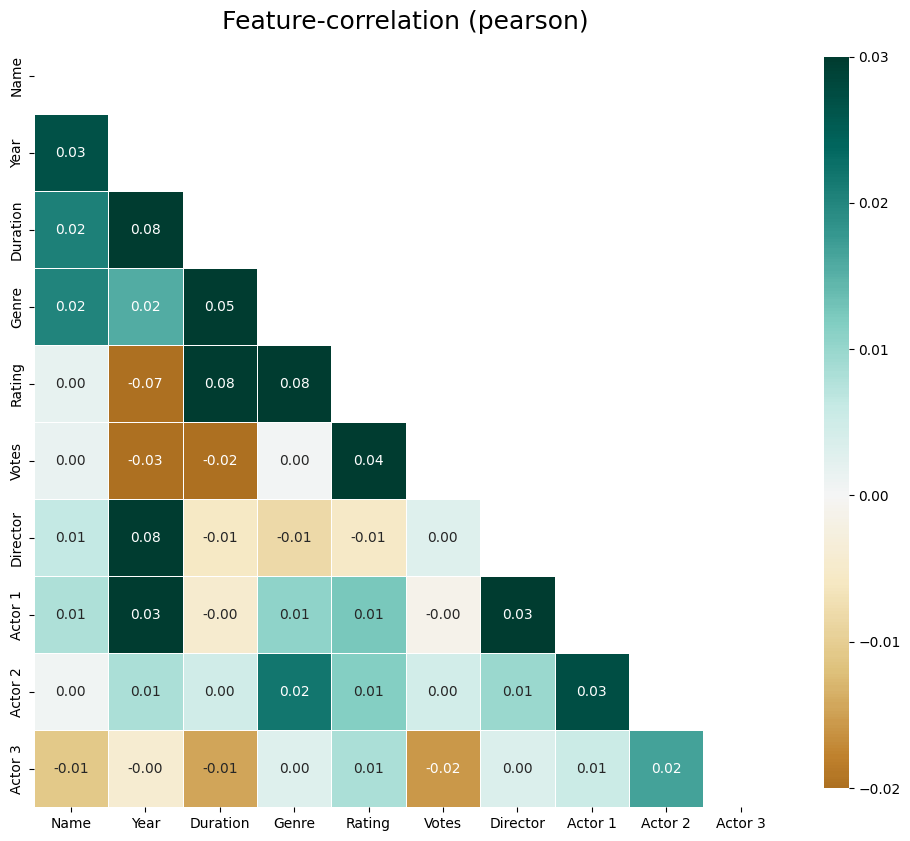

In [401]:
import klib

klib.corr_plot(dataset)

# visualization

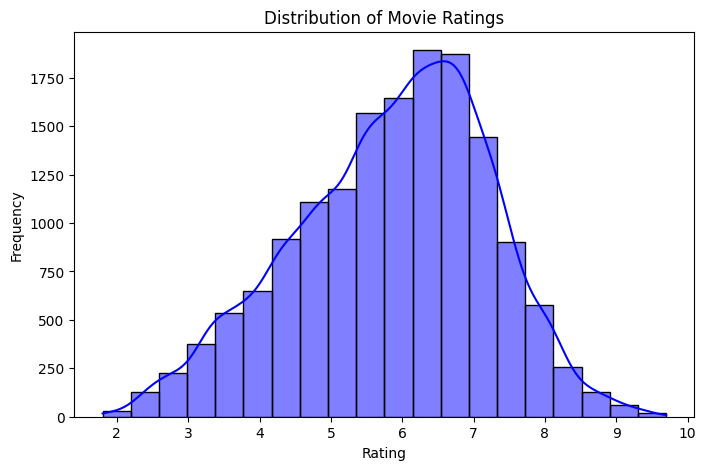

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of movie ratings
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
